In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [3]:
df_wwt = pd.read_csv('WrestlingTournament.csv')
display(df_wwt.head())
df_wwt.shape

,Unnamed: 0,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360


(500, 15)

In [4]:
fitur_loc = ['age','weight', 'strength','sports']
fitur = ['age','weight','strength']
df_wwt = df_wwt.loc[:100,(fitur_loc)]
X = df_wwt[fitur]
y = df_wwt.sports
display(df_wwt)

,age,weight,strength,sports
0,41,82,7,"Boxing, MMA"
1,36,100,8,Judo
2,29,93,8,Karate
3,39,107,7,Judo
4,29,72,5,MMA
...,...,...,...,...
96,30,89,5,Boxing
97,24,73,5,"Boxing, Kick-Boxing"
98,27,92,9,Kick-Boxing
99,25,85,6,"Boxing, Judo, Kick-Boxing"


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[ 1.78301544 -0.66963237  0.59572472]
 [ 0.88796296  0.86167788  1.23581192]
 [-0.36511052  0.26616834  1.23581192]
 [ 1.42499444  1.45718741  0.59572472]
 [-0.36511052 -1.52036028 -0.68444968]]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[-0.18610002  1.28704183  0.59572472]
 [-1.61818399 -1.26514191 -0.04436248]
 [ 0.35093147 -1.60543307 -0.68444968]
 [-0.00708952 -0.3293412  -0.68444968]
 [ 1.06697345 -0.49948678 -0.68444968]]
y Training: 80                  MMA
91    Judo, Kick-Boxing
68               Karate
51               Karate
27               Boxing
Name: sports, dtype: object


In [7]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [8]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['Judo' 'Judo' 'MMA' 'MMA' 'MMA' 'Judo' 'Boxing, Kick-Boxing' 'MMA'
 'Boxing, Kick-Boxing' 'Judo' 'Boxing, Kick-Boxing' 'Judo' 'Judo'
 'Boxing, Kick-Boxing' 'MMA' 'Judo' 'Judo' 'Judo' 'Boxing, Kick-Boxing'
 'Judo' 'Boxing, Kick-Boxing, MMA' 'Judo' 'Judo' 'Judo'
 'Boxing, Kick-Boxing' 'Boxing, Kick-Boxing, MMA' 'MMA' 'Judo' 'Judo'
 'Boxing' 'Boxing, Kick-Boxing']


Akurasi : 6.451612903225806 %


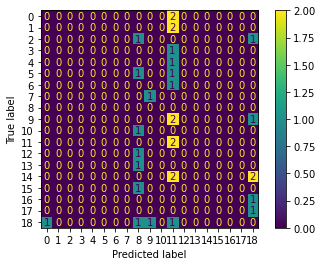

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))